### Preamble

In [13]:
from qiskit import Aer
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np
from qiskit import *
%matplotlib inline
import scipy.linalg as la
import math
import warnings
from qiskit.circuit.library.standard_gates import (HGate, RYGate, RZGate, XGate, ZGate, U1Gate, IGate)
from qiskit.tools.visualization import plot_histogram

import qiskit.circuit.library.standard_gates
from qiskit.converters import circuit_to_instruction
from qiskit.extensions import UnitaryGate

In [14]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%10.4f" % x))

In [15]:
%%html
<style>
#notebook-container {
    width: 100%;
    background-color: #EEE
}

.code_cell {
   flex-direction: column !important;
}

.code_cell .output_wrapper {
    width: 100%;
    background-color: #FFF
}

.code_cell .input {
    width: 100%;
    background-color: #FFF
}
</style>
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [16]:
%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>

# WHAT WE WANT

In [17]:
## ------------------------------------------------- 2021-01-19, (Previous) PERTURBED COIN UNITARY 
U1_phase_angle  =   1.5707963267948966 
U1_RZGate_phi   =   3.1415926535897931 
U1_RYGate_theta =   2.1208811557885126 
U1_RZGate_lamb  =   0.0000000000000000 
U2_phase_angle  =  -0.0000000000000000 
U2_RZGate_phi   =   3.1415926535897931 
U2_RYGate_theta =   1.9863951875382797 
U2_RZGate_lamb  =   3.1415926535897931 
MID_angle1      =   1.0877844350147556 
MID_angle2      =   0.1524284793158924 
V1_phase_angle  =   1.5707963267948966 
V1_RZGate_phi   =   3.1415926535897931 
V1_RYGate_theta =   2.6271333499550176 
V1_RZGate_lamb  =   0.0000000000000000 
V2_phase_angle  =   1.5707963267948966 
V2_RZGate_phi   =   3.1415926535897931 
V2_RYGate_theta =   0.5943894309337333 
V2_RZGate_lamb  =   0.0000000000000000 

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr) # Cannot have classical register for wrapping into custom_gate


alpha = MID_angle1
beta = MID_angle2

multiplex = UnitaryGate(np.array([[np.cos(MID_angle1), 0,                 -np.sin(MID_angle1), 0                  ],
                                  [0,                  np.cos(MID_angle2), 0,                  -np.sin(MID_angle2)],
                                  [np.sin(MID_angle1), 0,                  np.cos(MID_angle1), 0                  ],
                                  [0,                  np.sin(MID_angle2), 0,                   np.cos(MID_angle2)]]))
 
##############3# circ.ry(1.287002217587,0)# Rotate to get |sigma_2>
circ.crz(V2_RZGate_lamb,1,0)
circ.cry(V2_RYGate_theta,1,0)
circ.crz(V2_RZGate_phi,1,0)
circ.cu1(V2_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(V2_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)
circ.crz(V1_RZGate_lamb,1,0)
circ.cry(V1_RYGate_theta,1,0)
circ.crz(V1_RZGate_phi,1,0)
circ.cu1(V1_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(V1_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)
circ.unitary(multiplex, [0,1], label='GSVD MTPLX')
circ.crz(U2_RZGate_lamb,1,0)
circ.cry(U2_RYGate_theta,1,0)
circ.crz(U2_RZGate_phi,1,0)
circ.cu1(U2_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(U2_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)
circ.crz(U1_RZGate_lamb,1,0)
circ.cry(U1_RYGate_theta,1,0)
circ.crz(U1_RZGate_phi,1,0)
circ.cu1(U1_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(U1_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)


### Store these gates in custom_gate
custom_gate = circuit_to_instruction(circ)

# circ.measure(0,0)
# circ.measure(1,1)

# circ.draw(output='mpl')
circ.draw()
# circ.draw(output='mpl', interactive=False, filename='Perturbed_coin_20200902_0010.png')


/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/525232959.py:38: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(V2_phase_angle,1,0)
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/525232959.py:40: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(V2_phase_angle,1,0)
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/525232959.py:46: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(V1_phase_ang

┌───────┐┌─────────────┐┌───────┐          ┌───┐          ┌───┐     »
q27_0: ┤ Rz(0) ├┤ Ry(0.59439) ├┤ Rz(π) ├─■────────┤ X ├─■────────┤ X ├─────»
       └───┬───┘└──────┬──────┘└───┬───┘ │U1(π/2) └─┬─┘ │U1(π/2) └─┬─┘┌───┐»
q27_1: ────■───────────■───────────■─────■──────────■───■──────────■──┤ X ├»
                                                                      └───┘»
«       ┌───────┐┌────────────┐┌───────┐          ┌───┐          ┌───┐     »
«q27_0: ┤ Rz(0) ├┤ Ry(2.6271) ├┤ Rz(π) ├─■────────┤ X ├─■────────┤ X ├─────»
«       └───┬───┘└─────┬──────┘└───┬───┘ │U1(π/2) └─┬─┘ │U1(π/2) └─┬─┘┌───┐»
«q27_1: ────■──────────■───────────■─────■──────────■───■──────────■──┤ X ├»
«                                                                     └───┘»
«       ┌─────────────┐┌───────┐┌────────────┐┌───────┐        ┌───┐        »
«q27_0: ┤0            ├┤ Rz(π) ├┤ Ry(1.9864) ├┤ Rz(π) ├─■──────┤ X ├─■──────»
«       │  GSVD MTPLX │└───┬───┘└─────┬──────┘└───┬───┘ │U1(0) └─┬─┘ │U1(0) »
«q27_1: ┤1            ├────■──────────■───────────■─────■────────■───■──────»
«       └─────────────┘                                                     »
«       ┌───┐     ┌───────┐┌────────────┐┌───────┐          ┌───┐          »
«q27_0: ┤ X ├─────┤ Rz(0) ├┤ Ry(2.1209) ├┤ Rz(π) ├─■────────┤ X ├─■────────»
«       └─┬─┘┌───┐└───┬───┘└─────┬──────┘└───┬───┘ │U1(π/2) └─┬─┘ │U1(π/2) »
«q27_1: ──■──┤ X ├────■──────────■───────────■─────■──────────■───■────────»
«            └───┘                                                         »
«       ┌───┐     
«q27_0: ┤ X ├─────
«       └─┬─┘┌───┐
«q27_1: ──■──┤ X ├
«            └───┘

In [18]:
from qiskit.quantum_info import Operator

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr)
circ.append(custom_gate,[0,1]) # Single custom_gate

mat = Operator(circ)
unitary = mat.data

# print('Real: \n')
print(np.real(np.around(unitary,4)))
print('\n')
# print('Imag: \n')
print(np.imag(np.around(unitary,4)))

[[    0.8918    -0.0000    -0.4524     0.0000]
 [    0.3638     0.5148     0.7172    -0.2972]
 [    0.0000     0.5000     0.0000     0.8660]
 [    0.2689    -0.6964     0.5301     0.4021]]


[[   -0.0000    -0.0000     0.0000     0.0000]
 [   -0.0000    -0.0000    -0.0000     0.0000]
 [   -0.0000     0.0000    -0.0000    -0.0000]
 [   -0.0000    -0.0000    -0.0000    -0.0000]]


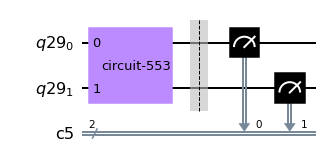

In [19]:
timesteps = 1
qr = QuantumRegister(timesteps+1)
cr = ClassicalRegister(timesteps+1)
circ = QuantumCircuit(qr,cr)
for i in range(0,timesteps):
    circ.append(custom_gate,[timesteps-i-1,timesteps])

circ.barrier()
for i in range(0,timesteps+1):
    circ.measure(i,i)


# circ.measure(0,0)
# circ.measure(1,1)

# circ.measure(timesteps,timesteps)

circ.draw(output='mpl')

## IDEAL -- save data for histogram

In [20]:
job = execute([circ],
              Aer.get_backend('qasm_simulator'), shots = 1000000)
results = job.result()
counts = results.get_counts()
fig = plot_histogram(counts, figsize=[6,3],title = 'Without noise')

# print('Done')

/opt/miniconda3/envs/qiskit-37/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/qiskit-37/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


# ibmq_manila

In [21]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ

IBMQ.save_account('d1c6ff343b14365b86172d0503f484880269543b4d365f4107e80009f3768f4bb8d5275afe8da21502d921b53b6091222f7a4390eac1fe846a79900110c64e0a', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-research')

provider.backends()

### Extract from backend
# Build noise model from backend properties
bknd = 'ibmq_manila'

backend = provider.get_backend(bknd)
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

### Extract from backend -- specific date
# Specifying a date: YYYY, MM, DD
from datetime import datetime, date
# mo = datetime(2020, 12, 12) # <-- Date of generating 61696 basis states files.
mo = datetime(2022, 9, 25)

# How to access properties of a specific date
real_backend = provider.backends.ibmq_manila
prop = real_backend.properties(datetime=mo)
print(prop.last_update_date)

### View noise model
# How to access properties of a specific date
real_backend = provider.backends.ibmq_manila
prop = real_backend.properties(datetime=mo)
print(prop.last_update_date)

# To see the details of the noise model
# noise_model.to_dict()

/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/2998694745.py:33: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  real_backend = provider.backends.ibmq_manila


2022-09-24 23:09:40+08:00
2022-09-24 23:09:40+08:00


# Noisy

In [22]:
job = execute([circ],
              Aer.get_backend('qasm_simulator'),
              noise_model = noise_model,
              basis_gates = basis_gates,
              shots = 1000000)
results = job.result()
counts = results.get_counts()
fig = plot_histogram(counts, figsize=[6,3],title = 'Without noise')

# print('Done')

# <u>GATE SET TOMOGRAPHY</u>
## TOMOGRAPHY OF INITIAL STATES

In [23]:
NshotsGST = 16384

## TOMOGRAPHY OF OPERATORS

## TOMOGRAPHY OF 169 BASIS STATES (2 QUBITS)

### 13 BASIS STATES (SINGLE QUBIT)

In [24]:
BasisStates_169 = [[[1,0],[0,1]],
               
               [[0,1],[1,0]],
               [[0,-1j],[1j,0]],
               [[1,0],[0,-1]],

               [[1/np.sqrt(2)*1,1/np.sqrt(2)*1j],[1/np.sqrt(2)*1j,1/np.sqrt(2)*1]],
               [[1/np.sqrt(2)*1,1/np.sqrt(2)*1],[1/np.sqrt(2)*(-1),1/np.sqrt(2)*1]],
               [[1/np.sqrt(2)*(1+1j),0],[0,1/np.sqrt(2)*(1-1j)]],
               
               [[1/np.sqrt(2)*1,1/np.sqrt(2)*(-1j)],[1/np.sqrt(2)*1j,1/np.sqrt(2)*(-1)]],
               [[1/np.sqrt(2)*1,1/np.sqrt(2)*1],[1/np.sqrt(2)*1,1/np.sqrt(2)*(-1)]],
               [[0,1/np.sqrt(2)*(1-1j)],[1/np.sqrt(2)*(1+1j),0]],
              
               [[1,0],[0,0]],
               [[0.5,0.5],[0.5,0.5]],
               [[0.5,-0.5j],[0.5j,0.5]]]

# BasisStates_169[0]

gatenames = 'BasisState00', 'BasisState01', 'BasisState02', 'BasisState03', 'BasisState04', 'BasisState05', 'BasisState06', 'BasisState07', 'BasisState08', 'BasisState09', 'BasisState10', 'BasisState11', 'BasisState12'


In [25]:
def GSTBasisGateMeasurements_169(circ):
    #================= START OF 16 MEASUREMENT BASES =================|||
    for j in range(0,16):

        print('[def GSTBasisGateMeasurements]: initial state k=%d, idx_gatenames_1 = %d, idx_gatenames_2 = %d, measurement basis %d' %(k,idx_gatenames_1,idx_gatenames_2,j))

        if j==0: # Identity basis  # Identity basis
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ0 = QuantumCircuit(qr)

            NC0 = circ + circ0
            NC0.measure(0,0)
            NC0.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC0, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) II_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==1: # Identity basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ1 = QuantumCircuit(qr)

            NC1 = circ + circ1
            NC1.h(1)
            NC1.measure(0,0)
            NC1.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC1, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) IX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==2: # Identity basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ2 = QuantumCircuit(qr)

            NC2 = circ + circ2
            NC2.sdg(1)
            NC2.h(1)
            NC2.measure(0,0)
            NC2.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC2, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) IY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==3: # Identity basis # Z basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ3 = QuantumCircuit(qr)

            NC3 = circ + circ3
            NC3.measure(0,0)
            NC3.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC3, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) IZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================


        elif j==4:   # X basis# Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ4 = QuantumCircuit(qr)

            NC4 = circ + circ4
            NC4.h(0)
            NC4.measure(0,0)
            NC4.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC4, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XI_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==5: # X basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ5 = QuantumCircuit(qr)

            NC5 = circ + circ5
            NC5.h(0)
            NC5.h(1)
            NC5.measure(0,0)
            NC5.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC5, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==6: # X basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ6 = QuantumCircuit(qr)

            NC6 = circ + circ6
            NC6.sdg(1)
            NC6.h(1)
            NC6.h(0)
            NC6.measure(0,0)
            NC6.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC6, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==7: # X basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ7 = QuantumCircuit(qr)

            NC7 = circ + circ7
            NC7.h(0)
            NC7.measure(0,0)
            NC7.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC7, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==8:  # Y basis # Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ8 = QuantumCircuit(qr)

            NC8 = circ + circ8
            NC8.sdg(0)
            NC8.h(0)
            NC8.measure(0,0)
            NC8.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC8, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YI_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==9:  # Y basis  # X basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ9 = QuantumCircuit(qr)

            NC9 = circ + circ9
            NC9.h(1)
            NC9.sdg(0)
            NC9.h(0)
            NC9.measure(0,0)
            NC9.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC9, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==10: # Y basis  # Y basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ10 = QuantumCircuit(qr)

            NC10 = circ + circ10
            NC10.sdg(0)
            NC10.h(0)
            NC10.sdg(1)
            NC10.h(1)
            NC10.measure(0,0)
            NC10.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC10, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==11: # Y basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ11 = QuantumCircuit(qr)

            NC11 = circ + circ11
            NC11.sdg(0)
            NC11.h(0)
            NC11.measure(0,0)
            NC11.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC11, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==12:  # Z basis # Identity basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ12 = QuantumCircuit(qr)

            NC12 = circ + circ12
            NC12.measure(0,0)
            NC12.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC12, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZI_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==13: # Z basis  # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ13 = QuantumCircuit(qr)

            NC13 = circ + circ13
            NC13.h(1)
            NC13.measure(0,0)
            NC13.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC13, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==14: # Z basis  # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ14 = QuantumCircuit(qr)

            NC14 = circ + circ14
            NC14.sdg(1)
            NC14.h(1)
            NC14.measure(0,0)
            NC14.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC14, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==15: # Z basis # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ15 = QuantumCircuit(qr)

            NC15 = circ + circ15
            NC15.measure(0,0)
            NC15.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC15, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()
    #================= END OF 16 MEASUREMENT BASES ===================||| 

In [26]:
def GSTBasisGateMeasurements_72(circ,idx_basis_gates_72):
    #================= START OF 16 MEASUREMENT BASES =================|||
    for j in range(0,16):

        print('[def GSTBasisGateMeasurements]: initial state k=%d, idx_gatenames = %d, measurement basis %d' %(k,idx_basis_gates_72,j))

        if j==0: # Identity basis  # Identity basis
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ0 = QuantumCircuit(qr)

            NC0 = circ + circ0
            NC0.measure(0,0)
            NC0.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC0, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) II_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==1: # Identity basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ1 = QuantumCircuit(qr)

            NC1 = circ + circ1
            NC1.h(1)
            NC1.measure(0,0)
            NC1.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC1, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) IX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==2: # Identity basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ2 = QuantumCircuit(qr)

            NC2 = circ + circ2
            NC2.sdg(1)
            NC2.h(1)
            NC2.measure(0,0)
            NC2.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC2, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) IY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==3: # Identity basis # Z basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ3 = QuantumCircuit(qr)

            NC3 = circ + circ3
            NC3.measure(0,0)
            NC3.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC3, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) IZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================


        elif j==4:   # X basis# Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ4 = QuantumCircuit(qr)

            NC4 = circ + circ4
            NC4.h(0)
            NC4.measure(0,0)
            NC4.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC4, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XI_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==5: # X basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ5 = QuantumCircuit(qr)

            NC5 = circ + circ5
            NC5.h(0)
            NC5.h(1)
            NC5.measure(0,0)
            NC5.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC5, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==6: # X basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ6 = QuantumCircuit(qr)

            NC6 = circ + circ6
            NC6.sdg(1)
            NC6.h(1)
            NC6.h(0)
            NC6.measure(0,0)
            NC6.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC6, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==7: # X basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ7 = QuantumCircuit(qr)

            NC7 = circ + circ7
            NC7.h(0)
            NC7.measure(0,0)
            NC7.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC7, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==8:  # Y basis # Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ8 = QuantumCircuit(qr)

            NC8 = circ + circ8
            NC8.sdg(0)
            NC8.h(0)
            NC8.measure(0,0)
            NC8.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC8, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YI_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==9:  # Y basis  # X basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ9 = QuantumCircuit(qr)

            NC9 = circ + circ9
            NC9.h(1)
            NC9.sdg(0)
            NC9.h(0)
            NC9.measure(0,0)
            NC9.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC9, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==10: # Y basis  # Y basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ10 = QuantumCircuit(qr)

            NC10 = circ + circ10
            NC10.sdg(0)
            NC10.h(0)
            NC10.sdg(1)
            NC10.h(1)
            NC10.measure(0,0)
            NC10.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC10, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==11: # Y basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ11 = QuantumCircuit(qr)

            NC11 = circ + circ11
            NC11.sdg(0)
            NC11.h(0)
            NC11.measure(0,0)
            NC11.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC11, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==12:  # Z basis # Identity basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ12 = QuantumCircuit(qr)

            NC12 = circ + circ12
            NC12.measure(0,0)
            NC12.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC12, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZI_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==13: # Z basis  # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ13 = QuantumCircuit(qr)

            NC13 = circ + circ13
            NC13.h(1)
            NC13.measure(0,0)
            NC13.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC13, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==14: # Z basis  # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ14 = QuantumCircuit(qr)

            NC14 = circ + circ14
            NC14.sdg(1)
            NC14.h(1)
            NC14.measure(0,0)
            NC14.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC14, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==15: # Z basis # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ15 = QuantumCircuit(qr)

            NC15 = circ + circ15
            NC15.measure(0,0)
            NC15.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC15, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()
    #================= END OF 16 MEASUREMENT BASES ===================||| 

In [27]:
# 16 scenarios # (2020-12-05) -- shortening the code by using resets.
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

gatenames = 'BasisState00', 'BasisState01', 'BasisState02', 'BasisState03', 'BasisState04', 'BasisState05', 'BasisState06', 'BasisState07', 'BasisState08', 'BasisState09', 'BasisState10', 'BasisState11', 'BasisState12'


for idx_gatenames_1 in range(0,3):
    for idx_gatenames_2 in range(0,13):
        print('idx_gatenames_2 = %d, idx_gatenames_1 = %d' %(idx_gatenames_2,idx_gatenames_1))
        
        #===============#=========================#
        # 16 SCENARIOS  #  13^2 BASIS OPERATIONS  #  -- BIG ENDIAN NOTATION FOR THE 13 BASIS GATES TENSORED PRODUCTS
        #==================================================================================

        # Initialise 16 different initial states
        for k in range(0,16):

            # print('Prepare initial state %.2d' %(k))
            if k==0: #|0> |0> 
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
                circ.barrier(0,1)

            elif k==1: #|0> |1>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.x(1)
                circ.barrier(0,1)

            elif k==2: #|0> |+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(1)
                circ.barrier(0,1)

            elif k==3: #|0> |y+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)

            #--------------------------------------------

            elif k==4: #|1> |0>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
                circ.x(0)
                circ.barrier(0,1)

            elif k==5: #|1> |1>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.x(0)
                circ.x(1)
                circ.barrier(0,1)

            elif k==6: #|1> |+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.x(0)
                circ.h(1)
                circ.barrier(0,1)

            elif k==7: #|1> |y+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.x(0)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)

            #--------------------------------------------

            elif k==8: #|+> |0>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
                circ.h(0)
                circ.barrier(0,1)

            elif k==9: #|+> |1>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(0)
                circ.x(1)
                circ.barrier(0,1)

            elif k==10: #|+> |+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(0)
                circ.h(1)
                circ.barrier(0,1)

            elif k==11: #|+> |y+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(0)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)   

            #--------------------------------------------

            elif k==12: #|y+> |0>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
                circ.h(0)
                circ.s(0)
                circ.barrier(0,1)

            elif k==13: #|y+> |1>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(0)
                circ.s(0)
                circ.x(1)
                circ.barrier(0,1)

            elif k==14: #|y+> |+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(0)
                circ.s(0)
                circ.h(1)
                circ.barrier(0,1)

            elif k==15: #|y+> |y+>
                qr = QuantumRegister(2)
                cr = ClassicalRegister(2)
                circ = QuantumCircuit(qr,cr)
                circ.h(0)
                circ.s(0)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)

            #-------------------------------------------- 
        
            if  idx_gatenames_2 < 10 and idx_gatenames_1 < 10: ### NEW SCENARIO 1
            
                circ.unitary(BasisStates_169[idx_gatenames_2],[0],label='%s' %(gatenames[idx_gatenames_2])) # q_2 on top row
                circ.unitary(BasisStates_169[idx_gatenames_1],[1],label='%s' %(gatenames[idx_gatenames_1])) # q_1 on bottom row
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            #==================================================================================

            ### PARTIALLY REPREPARE QUBIT_1

            elif idx_gatenames_2 < 10 and idx_gatenames_1 == 10: ### NEW SCENARIO 2
                print('Partially reprepare Qubit_1: idx_gatenames_1 = %d, idx_gatenames_2 = %d ' %(idx_gatenames_1,idx_gatenames_2))
                
                # qubit_2 (top row) = given 1 of the 13 basis gates
                circ.unitary(BasisStates_169[idx_gatenames_2],[0],label='%s' %(gatenames[idx_gatenames_2])) # q_2 on top row
                # qubit_1 (bot row) = reinitialised |+> state
                circ.reset(1)
                circ.h(1) 
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
            
            elif idx_gatenames_2 < 10 and idx_gatenames_1 == 11: ### NEW SCENARIO 3
                print('Partially reprepare Qubit_1: idx_gatenames_1 = %d, idx_gatenames_2 = %d ' %(idx_gatenames_1,idx_gatenames_2))
            
                # qubit_2 (top row) = given 1 of the 13 basis gates
                circ.unitary(BasisStates_169[idx_gatenames_2],[0],label='%s' %(gatenames[idx_gatenames_2])) # q_2 on top row
                # qubit_1 (bot row) = reinitialised |y+> state
                circ.reset(1)
                circ.h(1) 
                circ.s(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
            
            elif idx_gatenames_2 < 10 and idx_gatenames_1 == 12: ### NEW SCENARIO 4
                print('Partially reprepare Qubit_1: idx_gatenames_1 = %d, idx_gatenames_2 = %d ' %(idx_gatenames_1,idx_gatenames_2))
                
                # qubit_2 (top row) = given 1 of the 13 basis gates
                circ.unitary(BasisStates_169[idx_gatenames_2],[0],label='%s' %(gatenames[idx_gatenames_2])) # q_2 on top row
                # qubit_1 (bot row) = reinitialised |0> state
                circ.reset(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            #==================================================================================

            ### PARTIALLY REPREPARE QUBIT_2

            elif idx_gatenames_2 == 10 and idx_gatenames_1 < 10: ### NEW SCENARIO 5
                print('Partially reprepare Qubit_2: idx_gatenames_1 = %d, idx_gatenames_2 = %d ' %(idx_gatenames_1,idx_gatenames_2))
            
                # qubit_1 (bot row) = given 1 of the 13 basis gates
                circ.unitary(BasisStates_169[idx_gatenames_1],[1],label='%s' %(gatenames[idx_gatenames_1])) # q_1 on bottom row
                # qubit_2 (top row) = reinitialised |+> state
                circ.reset(0)
                circ.h(0)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            elif idx_gatenames_2 == 11 and idx_gatenames_1 < 10: ### NEW SCENARIO 6
                print('Partially reprepare Qubit_2: idx_gatenames_1 = %d, idx_gatenames_2 = %d ' %(idx_gatenames_1,idx_gatenames_2))
            
                # qubit_1 (bot row) = given 1 of the 13 basis gates
                circ.unitary(BasisStates_169[idx_gatenames_1],[1],label='%s' %(gatenames[idx_gatenames_1])) # q_1 on bottom row
                # qubit_2 (top row) = reinitialised |y+> state
                circ.reset(0)
                circ.h(0)
                circ.s(0)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            elif idx_gatenames_2 == 12 and idx_gatenames_1 < 10: ### NEW SCENARIO 7
                print('Partially reprepare Qubit_2: idx_gatenames_1 = %d, idx_gatenames_2 = %d ' %(idx_gatenames_1,idx_gatenames_2))
            
                # qubit_1 (bot row) = given 1 of the 13 basis gates
                circ.unitary(BasisStates_169[idx_gatenames_1],[1],label='%s' %(gatenames[idx_gatenames_1])) # q_1 on bottom row
                # qubit_2 (top row) = reinitialised |0> state
                circ.reset(0)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            #==================================================================================

            ### FULLY REPREPARE QUBIT_1 AND QUBIT_2

            elif idx_gatenames_2 == 10 and idx_gatenames_1 == 10: ### NEW SCENARIO 8
                        
                # qubit_1 (bot row) = reinitialised |+> state
                # qubit_2 (top row) = reinitialised |+> state
                circ.reset(0)
                circ.reset(1)
                circ.h(0)
                circ.h(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            elif idx_gatenames_2 == 10 and idx_gatenames_1 == 11: ### NEW SCENARIO 9
            
                # qubit_1 (bot row) = reinitialised |y+> state
                # qubit_2 (top row) = reinitialised |+> state
                circ.reset(0)
                circ.reset(1)
                circ.h(0)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            elif idx_gatenames_2 == 10 and idx_gatenames_1 == 12: ### NEW SCENARIO 10

            
                # qubit_1 (bot row) = reinitialised |0> state
                # qubit_2 (top row) = reinitialised |+> state
                circ.reset(0)
                circ.reset(1)
                circ.h(0)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            #==================================================================================

            elif idx_gatenames_2 == 11 and idx_gatenames_1 == 10: ### NEW SCENARIO 11
            
                # qubit_1 (bot row) = reinitialised |+> state
                # qubit_2 (top row) = reinitialised |y+> state
                circ.reset(0)
                circ.reset(1)
                circ.h(0)
                circ.s(0)
                circ.h(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
            
            elif idx_gatenames_2 == 11 and idx_gatenames_1 == 11: ### NEW SCENARIO 12
            
                # qubit_1 (bot row) = reinitialised |y+> state
                # qubit_2 (top row) = reinitialised |y+> state
                circ.reset(0)
                circ.reset(1)
                circ.h(0)
                circ.s(0)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
            
            elif idx_gatenames_2 == 11 and idx_gatenames_1 == 12: ### NEW SCENARIO 13
            
                # qubit_1 (bot row) = reinitialised |0> state
                # qubit_2 (top row) = reinitialised |y+> state
                circ.reset(0)
                circ.reset(1)
                circ.h(0)
                circ.s(0)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
            
            #==================================================================================

            elif idx_gatenames_2 == 12 and idx_gatenames_1 == 10: ### NEW SCENARIO 14

                # qubit_1 (bot row) = reinitialised |+> state
                # qubit_2 (top row) = reinitialised |0> state
                circ.reset(0)
                circ.reset(1)
                circ.h(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
                
            elif idx_gatenames_2 == 12 and idx_gatenames_1 == 11: ### NEW SCENARIO 15

                # qubit_1 (bot row) = reinitialised |y+> state
                # qubit_2 (top row) = reinitialised |0> state
                circ.reset(0)
                circ.reset(1)
                circ.h(1)
                circ.s(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)
                
            elif idx_gatenames_2 == 12 and idx_gatenames_1 == 12: ### NEW SCENARIO 16
            
                # qubit_1 (bot row) = reinitialised |0> state
                # qubit_2 (top row) = reinitialised |0> state
                circ.reset(0)
                circ.reset(1)
                circ.barrier(0,1)

                GSTBasisGateMeasurements_169(circ)

            #==================================================================================


            
circ.draw()
            
# print('0-168 basis states tomography done. ')
# Audio(sound_file, autoplay=True)

idx_gatenames_2 = 0, idx_gatenames_1 = 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 3


/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:12: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC0 = circ + circ0
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:38: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC1 = circ + circ1
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:65: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC2 = circ + circ2
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:93: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, m

/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:122: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC4 = circ + circ4
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:149: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC5 = circ + circ5
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:177: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC6 = circ + circ6
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:206: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flex

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 15


/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:378: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC13 = circ + circ13
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:405: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC14 = circ + circ14
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_96675/571834023.py:433: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  NC15 = circ + circ15


[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 0, mea

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 0, 

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gaten

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 0, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 1

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 1, m

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 1, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 2,

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 2, measurement basis 15
idx_gatenames_2 = 3, idx_gatenames_1 = 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=0

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 3, 

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 3, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 5, mea

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 5, me

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gaten

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 5, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 6

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 6, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 7, 

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 7, measurement basis 15
idx_gatenames_2 = 8, idx_gatenames_1 = 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 0
[def GSTBasisGateMeasurements]: initial st

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 8, m

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 8, mea

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 9,

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 9, mea

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenames_2 = 9, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 0, idx_gatenam

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenam

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 0, idx_gatenames_2 = 10 
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 4
[def GSTBasis

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 0, idx_gatenames_2 = 10 
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 0, idx_gatenames_2 = 10, measurement basis 6
[def GS

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 0, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 0, idx_gatenames_2 = 11 
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 3
[def GSTBasi

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 0, idx_

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 0, idx_gatenames_2 = 11, measurement basis 15
idx_gatenames_2 = 12, idx_gatenames_1 = 0
Partially reprepare Qubit_2: idx_gatenames_1 = 0, idx_gatenames_2 = 12 
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 0, idx_gatena

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 0, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 0, idx_gatenames_2 = 12 
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 2
[def GSTBas

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 0, idx_g

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 0, 

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 0, measurement basis 15
idx_gatenames_2 = 1, idx_gatenames_1 = 1
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=0, id

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 1, m

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 1, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 2, 

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 2, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 3,

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 3

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 3, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatena

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 4, 

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 4, mea

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 4, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatena

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 5

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 5, mea

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatena

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 5, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 6

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 6, 

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 6, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 7,

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 7, mea

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatena

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 8, 

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 8,

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 1, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 9, me

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 9, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 1, idx_gatenames_2 = 10 
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 1
[def GSTBa

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 1, idx_gatenames_2 

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, idx_gatenames_2 = 10, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 1, id

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 1, idx_gatenames_2 = 11 
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 4
[def GSTBasis

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 1, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 1, idx_gatenames_2 = 11 
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 3
[def GST

[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gatenames_2 = 11, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 1, idx_gat

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 1, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 1, idx_gatenames_2 = 12 
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisG

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 1, idx_ga

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 1, idx_gatenames_2 = 12, measurement basis 15
idx_gatenames_2 = 0, idx_gatenames_1 = 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initi

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 0, mea

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 0,

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 0, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 1, m

[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 1, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenam

idx_gatenames_2 = 2, idx_gatenames_1 = 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=0, idx_

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 2, me

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 2, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 3

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 3, mea

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 3, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gaten

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 4, 

[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 4, m

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 4

[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 4, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 5, m

[def GSTBasisGateMeasurements]: initial state k=11, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 5, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_

[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=0, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 6, mea

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 6, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatena

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 7, mea

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 7, 

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 7, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 8, mea

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 8,

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenam

[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 8, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 15
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=4, idx_gatenames_1 = 2, idx_gatenames_2 = 9, 

[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 9,

[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2 = 9, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=13, idx_gatenames_1 = 2, idx_gatenames_2

[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 2, idx_gatenames_2 = 10 
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=2, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 1
[def GSTBa

Partially reprepare Qubit_2: idx_gatenames_1 = 2, idx_gatenames_2 = 10 
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=6, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 7
[def GSTBasisGat

[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx

[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 2, idx_gatenames_2 = 10 
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=15, idx_gatenames_1 = 2, idx_gatenames_2 = 10, measurement basis 6
[def GS

[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=3, idx_gatenames_1 = 2, idx_gatename

[def GSTBasisGateMeasurements]: initial state k=7, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 2, idx_gatenames_2 = 11 
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=8, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 6
[def GSTBasisGa

[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 13
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, idx_gatenames_2 = 11, measurement basis 14
[def GSTBasisGateMeasurements]: initial state k=12, idx_gatenames_1 = 2, id

Partially reprepare Qubit_2: idx_gatenames_1 = 2, idx_gatenames_2 = 12 
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=1, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGat

[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=5, idx_gatenames_1 = 2, idx_gatenames

[def GSTBasisGateMeasurements]: initial state k=9, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 15
Partially reprepare Qubit_2: idx_gatenames_1 = 2, idx_gatenames_2 = 12 
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 0
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 1
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 2
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 3
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 4
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=10, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 6
[def GST

[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 5
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 6
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 7
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 8
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 9
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 10
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 11
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_gatenames_2 = 12, measurement basis 12
[def GSTBasisGateMeasurements]: initial state k=14, idx_gatenames_1 = 2, idx_

┌───┐┌───┐ ░                  ░ 
q156686_0: ┤ H ├┤ S ├─░───────|0>────────░─
           ├───┤├───┤ ░ ┌──────────────┐ ░ 
q156686_1: ┤ H ├┤ S ├─░─┤ BasisState02 ├─░─
           └───┘└───┘ ░ └──────────────┘ ░ 
 c10598: 2/════════════════════════════════

## TOMOGRAPHY OF REMAINING 72 BASIS STATES (2 QUBITS)

### READ REMAINING 72 BASIS STATES 

In [ ]:
BasisStates_241 = []
for ii in range(169,241):
    BS_2qubits = np.loadtxt('2qubit_basisgates/BG_%.3d.txt' %(ii) , dtype=complex, delimiter=',',usecols=range(4)) ## RANGE IS FOR NUMBER OF COLS i.e. NO OF OPERATORS
    BasisStates_241.append(np.matrix(BS_2qubits))

In [ ]:
from qiskit.tools.visualization import plot_histogram
import time

for idx_basis_gates_72 in range(169,241):#range(169,241):
    
    print('BasisStates_241[%d]' %(idx_basis_gates_72-169))
    
    for k in range(0,16):

        if k==0: #|0> |0> 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
            circ.barrier(0,1)

        elif k==1: #|0> |1>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.x(1)
            circ.barrier(0,1)

        elif k==2: #|0> |+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(1)
            circ.barrier(0,1)

        elif k==3: #|0> |y+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(1)
            circ.s(1)
            circ.barrier(0,1)

        #--------------------------------------------

        elif k==4: #|1> |0>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
            circ.x(0)
            circ.barrier(0,1)

        elif k==5: #|1> |1>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.x(0)
            circ.x(1)
            circ.barrier(0,1)

        elif k==6: #|1> |+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.x(0)
            circ.h(1)
            circ.barrier(0,1)

        elif k==7: #|1> |y+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.x(0)
            circ.h(1)
            circ.s(1)
            circ.barrier(0,1)

        #--------------------------------------------

        elif k==8: #|+> |0>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
            circ.h(0)
            circ.barrier(0,1)

        elif k==9: #|+> |1>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(0)
            circ.x(1)
            circ.barrier(0,1)

        elif k==10: #|+> |+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(0)
            circ.h(1)
            circ.barrier(0,1)

        elif k==11: #|+> |y+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(0)
            circ.h(1)
            circ.s(1)
            circ.barrier(0,1)   

        #--------------------------------------------

        elif k==12: #|y+> |0>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr) # Cannot have classical register for wrapping into custom_gate
            circ.h(0)
            circ.s(0)
            circ.barrier(0,1)

        elif k==13: #|y+> |1>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(0)
            circ.s(0)
            circ.x(1)
            circ.barrier(0,1)

        elif k==14: #|y+> |+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(0)
            circ.s(0)
            circ.h(1)
            circ.barrier(0,1)

        elif k==15: #|y+> |y+>
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ = QuantumCircuit(qr,cr)
            circ.h(0)
            circ.s(0)
            circ.h(1)
            circ.s(1)
            circ.barrier(0,1)

        #--------------------------------------------  


        # INPUT BASIS GATE
        circ.unitary(BasisStates_241[idx_basis_gates_72-169],[0,1],label='BasisStates %d' %(idx_basis_gates_72)) # RE-RUN ON 2020-12-04 1800 hrs -- This is correct

        circ.barrier(0,1)
        
        GSTBasisGateMeasurements_72(circ,idx_basis_gates_72)

 
    
    # =================================================================================================================
                
print('169-240 basis states tomography done. ')
# Audio(sound_file, autoplay=True)